In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)


# drive/"My Drive"/Colab_Notebooks/Word2Vec/simpsons_dataset.csv

In [3]:
df_Human = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Human/Demian_Eng_Human_Translated_Chapters.csv', encoding='cp1252')
df_DeepL = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/DeepL/Demian_Eng_DeepL_Translated.csv', encoding='cp1252')
df_Google = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Google/Demian_Eng_Google_Translated_Chapters.csv', encoding='cp1252')
df_Microsoft = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Microsoft/Demian_Eng_Microsoft_Translated_Chapters.csv', encoding='cp1252')
df_Papago = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Papago/Demian_Eng_Papago_Translated.csv', encoding='cp1252')

df_Original = pd.read_csv('drive/My Drive/Colab_Notebooks/Word2Vec/Dataset/Demian_Ger_Original_Chapters.csv', encoding='cp1252')


print(df_Human.shape)
print(df_DeepL.shape)
print(df_Google.shape)
print(df_Microsoft.shape)
print(df_Papago.shape)
print(df_Original.shape)

(2177, 2)
(4640, 2)
(1952, 2)
(2124, 2)
(4435, 2)
(2129, 2)


In [0]:
print(df_Human.head())
print(df_DeepL.head())
print(df_Google.head())
print(df_Microsoft.head())
print(df_Papago.head())

   raw_character_text                           spoken_words
0                   1                                DEMIAN 
1                   2                                    NaN
2                   3                                    NaN
3                   4  V. The Bird Struggles Out of the Egg 
4                   5                                    NaN
   raw_character_text                              spoken_words
0                   1                                    demian
1                   2                                       NaN
2                   3  I didn't want anything but to live that.
3                   4    try to figure something out on my own.
4                   5            wanted to. Why was it so hard?
   raw_character_text                         spoken_words
0                 1.0                               Demian
1                 2.0                                  NaN
2                 3.0                        Fifth chapter
3             

In [0]:
print(df_Human.isnull().sum())
print(df_DeepL.isnull().sum())
print(df_Google.isnull().sum())

print(df_Microsoft.isnull().sum())
print(df_Papago.isnull().sum())
print(df_Original.isnull().sum())

raw_character_text      0
spoken_words          280
dtype: int64
raw_character_text      0
spoken_words          768
dtype: int64
raw_character_text      0
spoken_words          348
dtype: int64
raw_character_text      0
spoken_words          351
dtype: int64
raw_character_text      0
spoken_words          668
dtype: int64
raw_character_text      0
spoken_words          356
dtype: int64


In [4]:
df_Human = df_Human.dropna().reset_index(drop=True)
df_DeepL = df_DeepL.dropna().reset_index(drop=True)
df_Google = df_Google.dropna().reset_index(drop=True)
df_Microsoft = df_Microsoft.dropna().reset_index(drop=True)
df_Papago = df_Papago.dropna().reset_index(drop=True)
df_Original = df_Original.dropna().reset_index(drop=True)

print(df_Human.isnull().sum())
print(df_DeepL.isnull().sum())
print(df_Google.isnull().sum())
print(df_Microsoft.isnull().sum())
print(df_Papago.isnull().sum())
print(df_Original.isnull().sum())


raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64
raw_character_text    0
spoken_words          0
dtype: int64


In [0]:
print(df_Human.shape)
print(df_DeepL.shape)
print(df_Google.shape)
print(df_Microsoft.shape)
print(df_Papago.shape)

(1897, 2)
(3872, 2)
(1604, 2)
(1773, 2)
(3767, 2)


In [0]:
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed




def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [0]:
brief_cleaning_Human = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Human['spoken_words'])
brief_cleaning_DeepL = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_DeepL['spoken_words'])
brief_cleaning_Google = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Google['spoken_words'])
brief_cleaning_Microsoft = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Microsoft['spoken_words'])
brief_cleaning_Papago = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Papago['spoken_words'])
brief_cleaning_Original = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_Original['spoken_words'])

In [0]:
txt_Human = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Human, batch_size=5000, n_threads=-1)]
txt_DeepL = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_DeepL, batch_size=5000, n_threads=-1)]
txt_Google = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Google, batch_size=5000, n_threads=-1)]
txt_Microsoft = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Microsoft, batch_size=5000, n_threads=-1)]
txt_Papago = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Papago, batch_size=5000, n_threads=-1)]
txt_Original = [cleaning(doc) for doc in nlp.pipe(brief_cleaning_Original, batch_size=5000, n_threads=-1)]

In [8]:
df_clean_Human = pd.DataFrame({'clean': txt_Human})
df_clean_Human = df_clean_Human.dropna().drop_duplicates()
df_clean_Human.shape

(1598, 1)

In [9]:
df_clean_DeepL = pd.DataFrame({'clean': txt_DeepL})
df_clean_DeepL = df_clean_DeepL.dropna().drop_duplicates()
df_clean_DeepL.shape

(3326, 1)

In [10]:
df_clean_Google = pd.DataFrame({'clean': txt_Google})
df_clean_Google = df_clean_Google.dropna().drop_duplicates()
df_clean_Google.shape

(1376, 1)

In [11]:
df_clean_Microsoft = pd.DataFrame({'clean': txt_Microsoft})
df_clean_Microsoft = df_clean_Microsoft.dropna().drop_duplicates()
df_clean_Microsoft.shape

(1544, 1)

In [12]:
df_clean_Papago = pd.DataFrame({'clean': txt_Papago})
df_clean_Papago = df_clean_Papago.dropna().drop_duplicates()
df_clean_Papago.shape

(3224, 1)

In [13]:
df_clean_Original = pd.DataFrame({'clean': txt_Original})
df_clean_Original = df_clean_Original.dropna().drop_duplicates()
df_clean_Original.shape

(1693, 1)

In [0]:
print(df_clean_Human)
print(df_clean_DeepL)
print(df_clean_Google)
print(df_clean_Microsoft)
print(df_clean_Papago)

                                                 clean
1                                  v bird struggle egg
2                          paint dream bird way search
3                      friend miraculous fashion reply
5                             sinclair classroom break
6           lesson desk sinclair find piece paper tuck
7                              book fold customary way
8                                note write class sole
9                                 surprise send note f
10                     kind sinclair sort relationship
11                   school fellow sinclair think turn
12                               invitation school rag
13     sinclair refuse involve sinclair place paper un
14                                    read book lesson
15                            start note find way hand
16           sinclair fidget paper unfold casually see
17                        contain word sinclair glance
18               phrase pull short sinclair panic read
19        

In [14]:
pip install paramiko

     |████████████████████████████████| 194kB 3.4MB/s 
     |████████████████████████████████| 768kB 42.8MB/s 
     |████████████████████████████████| 61kB 22.5MB/s 
     |████████████████████████████████| 2.3MB 43.5MB/s 
     |████████████████████████████████| 102kB 29.1MB/s 


In [15]:
from gensim.models.phrases import Phrases, Phraser

INFO - 16:51:50: 'pattern' package not found; tag filters are not available for English


In [0]:
sent_Human = [row.split() for row in df_clean_Human['clean']]
sent_DeepL = [row.split() for row in df_clean_DeepL['clean']]
sent_Google = [row.split() for row in df_clean_Google['clean']]
sent_Microsoft = [row.split() for row in df_clean_Microsoft['clean']]
sent_Papago = [row.split() for row in df_clean_Papago['clean']]
sent_Original = [row.split() for row in df_clean_Original['clean']]


In [17]:
phrases_Human = Phrases(sent_Human, min_count=3, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_DeepL = Phrases(sent_DeepL, min_count=3, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_Google = Phrases(sent_Google, min_count=3, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_Microsoft = Phrases(sent_Microsoft, min_count=3, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_Papago = Phrases(sent_Papago, min_count=3, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")
phrases_Original = Phrases(sent_Original, min_count=3, progress_per=10000)
print("---------------------------------------------------Finished----------------------------------------------------------------------")


INFO - 16:51:55: collecting all words and their counts
INFO - 16:51:55: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 16:51:55: collected 8687 word types from a corpus of 7947 words (unigram + bigrams) and 1598 sentences
INFO - 16:51:55: using 8687 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
INFO - 16:51:55: collecting all words and their counts
INFO - 16:51:55: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 16:51:55: collected 16431 word types from a corpus of 17870 words (unigram + bigrams) and 3326 sentences
INFO - 16:51:55: using 16431 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>
INFO - 16:51:55: collecting all words and their counts
INFO - 16:51:55: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 16:51:55: collected 7618 word types from a corpus of 7172 words (unigram + bigrams) and 1376 sentences
INFO - 16:51:55: using 7618 coun

---------------------------------------------------Finished----------------------------------------------------------------------
---------------------------------------------------Finished----------------------------------------------------------------------
---------------------------------------------------Finished----------------------------------------------------------------------
---------------------------------------------------Finished----------------------------------------------------------------------
---------------------------------------------------Finished----------------------------------------------------------------------


INFO - 16:51:55: collected 17185 word types from a corpus of 19624 words (unigram + bigrams) and 1693 sentences
INFO - 16:51:55: using 17185 counts as vocab in Phrases<0 vocab, min_count=3, threshold=10.0, max_vocab_size=40000000>


---------------------------------------------------Finished----------------------------------------------------------------------


In [18]:
bigram_Human = Phraser(phrases_Human)
bigram_DeepL = Phraser(phrases_DeepL)
bigram_Google = Phraser(phrases_Google)
bigram_Microsoft = Phraser(phrases_Microsoft)
bigram_Papago = Phraser(phrases_Papago)

bigram_Original = Phraser(phrases_Original)


INFO - 16:51:57: source_vocab length 8687
INFO - 16:51:57: Phraser built with 16 phrasegrams
INFO - 16:51:57: source_vocab length 16431
INFO - 16:51:58: Phraser built with 47 phrasegrams
INFO - 16:51:58: source_vocab length 7618
INFO - 16:51:58: Phraser built with 10 phrasegrams
INFO - 16:51:58: source_vocab length 7892
INFO - 16:51:58: Phraser built with 11 phrasegrams
INFO - 16:51:58: source_vocab length 14986
INFO - 16:51:58: Phraser built with 42 phrasegrams
INFO - 16:51:58: source_vocab length 17185
INFO - 16:51:58: Phraser built with 120 phrasegrams


In [19]:
sentences_Human = bigram_Human[sent_Human]
sentences_DeepL = bigram_DeepL[sent_DeepL]
sentences_Google = bigram_Google[sent_Google]
sentences_Microsoft = bigram_Microsoft[sent_Microsoft]
sentences_Papago = bigram_Papago[sent_Papago]
sentences_Original = bigram_Original[sent_Original]


sentences_Human
sentences_DeepL
sentences_Google
sentences_Microsoft
sentences_Papago

In [20]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [21]:
word_freq_Human = defaultdict(int)
for sent in sentences_Human:
    for i in sent:
        word_freq_Human[i] += 1
len(word_freq_Human)
#print(word_freq_Human)

2636

In [22]:
possible_w_H = []
for keys in word_freq_Human:
  checker = False
  for tmp in wn.synsets(keys):
    if(tmp.name().split('.')[0] == keys):
      if (tmp.pos()=="v" or tmp.pos()=="a" ):
        checker = True      
        
  if(checker):
    possible_w_H.append(keys)
  
  
  
#   if (wn.synsets(keys)[0].pos()=="v"):
#     possible_w_H.append(keys)  
  
  
len(possible_w_H)

1217

In [23]:
word_freq_DeepL = defaultdict(int)
for sent in sentences_DeepL:
    for i in sent:
        word_freq_DeepL[i] += 1
len(word_freq_DeepL)


3459

In [24]:
word_freq_Google = defaultdict(int)
for sent in sentences_Google:
    for i in sent:
        word_freq_Google[i] += 1
len(word_freq_Google)

2128

In [25]:
word_freq_Microsoft = defaultdict(int)
for sent in sentences_Microsoft:
    for i in sent:
        word_freq_Microsoft[i] += 1
len(word_freq_Microsoft)

2265

In [26]:
word_freq_Papago = defaultdict(int)
for sent in sentences_Papago:
    for i in sent:
        word_freq_Papago[i] += 1
len(word_freq_Papago)

3077

In [27]:
word_freq_Original = defaultdict(int)
for sent in sentences_Original:
    for i in sent:
        word_freq_Original[i] += 1
len(word_freq_Original)

3854

In [0]:
print(sorted(word_freq_Human, key=word_freq_Human.get, reverse=True)[:10])
print(sorted(word_freq_DeepL, key=word_freq_DeepL.get, reverse=True)[:10])
print(sorted(word_freq_Google, key=word_freq_Google.get, reverse=True)[:10])
print(sorted(word_freq_Microsoft, key=word_freq_Microsoft.get, reverse=True)[:10])
print(sorted(word_freq_Papago, key=word_freq_Papago.get, reverse=True)[:10])

print(sorted(word_freq_Original, key=word_freq_Original.get, reverse=True)[:10])




['dream', 'know', 'time', 's', 'feel', 'way', 'world', 'like', 'say', 'new']
['not', 'like', 'know', 'be', 'come', 'feel', 'look', 'want', 'world', 'dream']
['know', 'dream', 'say', 'be', 'want', 'look', 'come', 'time', 'like', 'think']
['not', 'dream', 'be', 'know', 'like', 'come', 'want', 'feel', 'look', 'say']
['be', 'not', 'know', 'like', 'look', 'think', 'have', 'dream', 'feel', 'come']
['und', 'ich', 'die', 'sie', 'der', 'war', 'das', 'mir', 'nicht', 'es']


In [0]:
import multiprocessing

from gensim.models import Word2Vec

In [29]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

2

In [0]:
w2v_model_Human = Word2Vec(min_count=3, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_DeepL = Word2Vec(min_count=3, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_Google = Word2Vec(min_count=3, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_Microsoft = Word2Vec(min_count=3, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_Papago = Word2Vec(min_count=3, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)
w2v_model_Original = Word2Vec(min_count=3, window=3, size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)

In [0]:
print(w2v_model_Human)
print(w2v_model_DeepL)
print(w2v_model_Google)
print(w2v_model_Microsoft)
print(w2v_model_Papago)

Word2Vec(vocab=0, size=300, alpha=0.03)
Word2Vec(vocab=0, size=300, alpha=0.03)
Word2Vec(vocab=0, size=300, alpha=0.03)
Word2Vec(vocab=0, size=300, alpha=0.03)
Word2Vec(vocab=0, size=300, alpha=0.03)


In [31]:
w2v_model_Human.build_vocab(sentences_Human, progress_per = 10000)
print("-------------------------Done------------------------------------")
w2v_model_DeepL.build_vocab(sentences_DeepL, progress_per = 10000)
print("-------------------------Done------------------------------------")
w2v_model_Google.build_vocab(sentences_Google, progress_per = 10000)
print("-------------------------Done------------------------------------")
w2v_model_Microsoft.build_vocab(sentences_Microsoft, progress_per = 10000)
print("-------------------------Done------------------------------------")
w2v_model_Papago.build_vocab(sentences_Papago, progress_per = 10000)
print("-------------------------Done------------------------------------")
w2v_model_Original.build_vocab(sentences_Original, progress_per = 10000)
print("-------------------------Done------------------------------------")

INFO - 16:52:13: collecting all words and their counts
INFO - 16:52:13: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:52:13: collected 2636 word types from a corpus of 7857 raw words and 1598 sentences
INFO - 16:52:13: Loading a fresh vocabulary
INFO - 16:52:13: effective_min_count=3 retains 689 unique words (26% of original 2636, drops 1947)
INFO - 16:52:13: effective_min_count=3 leaves 5475 word corpus (69% of original 7857, drops 2382)
INFO - 16:52:13: deleting the raw counts dictionary of 2636 items
INFO - 16:52:13: sample=6e-05 downsamples 689 most-common words
INFO - 16:52:13: downsampling leaves estimated 1254 word corpus (22.9% of prior 5475)
INFO - 16:52:13: estimated required memory for 689 words and 300 dimensions: 1998100 bytes
INFO - 16:52:13: resetting layer weights
INFO - 16:52:13: collecting all words and their counts
INFO - 16:52:13: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:52:13: collected 3459 word type

-------------------------Done------------------------------------
-------------------------Done------------------------------------


INFO - 16:52:13: deleting the raw counts dictionary of 2128 items
INFO - 16:52:13: sample=6e-05 downsamples 587 most-common words
INFO - 16:52:13: downsampling leaves estimated 1070 word corpus (20.6% of prior 5191)
INFO - 16:52:13: estimated required memory for 587 words and 300 dimensions: 1702300 bytes
INFO - 16:52:13: resetting layer weights
INFO - 16:52:13: collecting all words and their counts
INFO - 16:52:13: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:52:13: collected 2265 word types from a corpus of 7463 raw words and 1544 sentences
INFO - 16:52:13: Loading a fresh vocabulary
INFO - 16:52:13: effective_min_count=3 retains 595 unique words (26% of original 2265, drops 1670)
INFO - 16:52:13: effective_min_count=3 leaves 5406 word corpus (72% of original 7463, drops 2057)
INFO - 16:52:13: deleting the raw counts dictionary of 2265 items
INFO - 16:52:13: sample=6e-05 downsamples 595 most-common words
INFO - 16:52:13: downsampling leaves estimated 11

-------------------------Done------------------------------------
-------------------------Done------------------------------------


INFO - 16:52:14: sample=6e-05 downsamples 1094 most-common words
INFO - 16:52:14: downsampling leaves estimated 4090 word corpus (27.9% of prior 14635)
INFO - 16:52:14: estimated required memory for 1094 words and 300 dimensions: 3172600 bytes
INFO - 16:52:14: resetting layer weights
INFO - 16:52:14: collecting all words and their counts
INFO - 16:52:14: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:52:14: collected 3854 word types from a corpus of 18672 raw words and 1693 sentences
INFO - 16:52:14: Loading a fresh vocabulary
INFO - 16:52:14: effective_min_count=3 retains 990 unique words (25% of original 3854, drops 2864)
INFO - 16:52:14: effective_min_count=3 leaves 15198 word corpus (81% of original 18672, drops 3474)
INFO - 16:52:14: deleting the raw counts dictionary of 3854 items
INFO - 16:52:14: sample=6e-05 downsamples 990 most-common words
INFO - 16:52:14: downsampling leaves estimated 3820 word corpus (25.1% of prior 15198)
INFO - 16:52:14: estim

-------------------------Done------------------------------------
-------------------------Done------------------------------------


In [32]:
w2v_model_Human.corpus_total_words
w2v_model_Original.corpus_total_words
w2v_model_Microsoft.corpus_total_words


7463

In [33]:
total_examples_H = w2v_model_Human.corpus_count
total_examples_D = w2v_model_DeepL.corpus_count
total_examples_G = w2v_model_Google.corpus_count
total_examples_M = w2v_model_Microsoft.corpus_count
total_examples_P = w2v_model_Papago.corpus_count
total_examples_O = w2v_model_Original.corpus_count
print(total_examples_H)
print(total_examples_D)
print(total_examples_G)
print(total_examples_M)
print(total_examples_P)
print(total_examples_O)

1598
3326
1376
1544
3224
1693


In [34]:
#from gensim.models import KeyedVectors
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True)
w2v_model_Human.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")


INFO - 16:52:24: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:52:24: this function is deprecated, use smart_open.open instead
INFO - 16:54:55: loaded (3000000, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 16:54:55: collecting all words and their counts
INFO - 16:54:55: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:54:58: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 16:54:58: Updating model with new vocabulary
INFO - 16:54:59: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 16:54:59: deleting the raw counts dictionary of 3000000 items
INFO - 16:54:59: sample=6e-05 downsamples 0 most-common words
INFO - 16:54:59: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 16:54:59: e

-------------------------Done------------------------------------


In [35]:
w2v_model_DeepL.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")


INFO - 16:55:13: collecting all words and their counts
INFO - 16:55:13: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:55:16: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 16:55:16: Updating model with new vocabulary
INFO - 16:55:17: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 16:55:17: deleting the raw counts dictionary of 3000000 items
INFO - 16:55:17: sample=6e-05 downsamples 0 most-common words
INFO - 16:55:17: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 16:55:17: estimated required memory for 1257 words and 300 dimensions: 3645300 bytes
INFO - 16:55:17: updating layer weights


-------------------------Done------------------------------------


In [36]:
w2v_model_Google.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")


INFO - 16:55:17: collecting all words and their counts
INFO - 16:55:17: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:55:19: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 16:55:19: Updating model with new vocabulary
INFO - 16:55:21: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 16:55:21: deleting the raw counts dictionary of 3000000 items
INFO - 16:55:21: sample=6e-05 downsamples 0 most-common words
INFO - 16:55:21: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 16:55:21: estimated required memory for 587 words and 300 dimensions: 1702300 bytes
INFO - 16:55:21: updating layer weights


-------------------------Done------------------------------------


In [37]:
w2v_model_Microsoft.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")


INFO - 16:55:21: collecting all words and their counts
INFO - 16:55:21: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:55:23: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 16:55:23: Updating model with new vocabulary
INFO - 16:55:25: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 16:55:25: deleting the raw counts dictionary of 3000000 items
INFO - 16:55:25: sample=6e-05 downsamples 0 most-common words
INFO - 16:55:25: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 16:55:25: estimated required memory for 595 words and 300 dimensions: 1725500 bytes
INFO - 16:55:25: updating layer weights


-------------------------Done------------------------------------


In [38]:
w2v_model_Papago.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")


INFO - 16:55:25: collecting all words and their counts
INFO - 16:55:25: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:55:27: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 16:55:27: Updating model with new vocabulary
INFO - 16:55:29: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 16:55:29: deleting the raw counts dictionary of 3000000 items
INFO - 16:55:29: sample=6e-05 downsamples 0 most-common words
INFO - 16:55:29: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 16:55:29: estimated required memory for 1094 words and 300 dimensions: 3172600 bytes
INFO - 16:55:29: updating layer weights


-------------------------Done------------------------------------


In [39]:
w2v_model_Original.build_vocab([list(model.vocab.keys())], update=True)
print("-------------------------Done------------------------------------")

INFO - 16:55:29: collecting all words and their counts
INFO - 16:55:29: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 16:55:31: collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
INFO - 16:55:31: Updating model with new vocabulary
INFO - 16:55:32: New added 0 unique words (0% of original 3000000) and increased the count of 0 pre-existing words (0% of original 3000000)
INFO - 16:55:32: deleting the raw counts dictionary of 3000000 items
INFO - 16:55:33: sample=6e-05 downsamples 0 most-common words
INFO - 16:55:33: downsampling leaves estimated 0 word corpus (0.0% of prior 0)
INFO - 16:55:33: estimated required memory for 990 words and 300 dimensions: 2871000 bytes
INFO - 16:55:33: updating layer weights


-------------------------Done------------------------------------


In [40]:
w2v_model_Human.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_DeepL.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_Google.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_Microsoft.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_Papago.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")
w2v_model_Original.intersect_word2vec_format("/content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
print("-------------------------Done------------------------------------")

INFO - 16:55:35: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:55:35: this function is deprecated, use smart_open.open instead
INFO - 16:57:49: merged 667 vectors into (689, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 16:57:49: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 16:57:49: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 17:00:03: merged 1198 vectors into (1257, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 17:00:03: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 17:00:03: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 17:02:18: merged 570 vectors into (587, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 17:02:18: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 17:02:18: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 17:04:32: merged 572 vectors into (595, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 17:04:32: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 17:04:32: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 17:06:46: merged 1046 vectors into (1094, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
INFO - 17:06:46: loading projection weights from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin
WARNING - 17:06:46: this function is deprecated, use smart_open.open instead


-------------------------Done------------------------------------


INFO - 17:09:01: merged 433 vectors into (990, 300) matrix from /content/drive/My Drive/Colab_Notebooks/Word2Vec/GoogleNews-vectors-negative300.bin


-------------------------Done------------------------------------


In [41]:
w2v_model_Human.train(sentences_Human, total_examples=total_examples_H, epochs=10, report_delay=1)
print("----------------------------------Done----------------------------------")
w2v_model_DeepL.train(sentences_DeepL, total_examples=total_examples_D, epochs=10, report_delay=1)
print("----------------------------------Done----------------------------------")
w2v_model_Google.train(sentences_Google, total_examples=total_examples_G, epochs=10, report_delay=1)
print("----------------------------------Done----------------------------------")
w2v_model_Microsoft.train(sentences_Microsoft, total_examples=total_examples_M, epochs=10, report_delay=1)
print("----------------------------------Done----------------------------------")
w2v_model_Papago.train(sentences_Papago, total_examples=total_examples_P, epochs=10, report_delay=1)

print("----------------------------------Done----------------------------------")
w2v_model_Original.train(sentences_Original, total_examples=total_examples_O, epochs=10, report_delay=1)

print("----------------------------------Done----------------------------------")

INFO - 17:09:24: training model with 1 workers on 689 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=3
INFO - 17:09:24: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:24: EPOCH - 1 : training on 7857 raw words (1181 effective words) took 0.1s, 21234 effective words/s
INFO - 17:09:24: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:24: EPOCH - 2 : training on 7857 raw words (1311 effective words) took 0.1s, 24215 effective words/s
INFO - 17:09:24: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:24: EPOCH - 3 : training on 7857 raw words (1231 effective words) took 0.0s, 27269 effective words/s
INFO - 17:09:24: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:24: EPOCH - 4 : training on 7857 raw words (1256 effective words) took 0.0s, 27848 effective words/s
INFO - 17:09:25: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:25: EPOCH - 5 : trainin

----------------------------------Done----------------------------------


INFO - 17:09:25: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:25: EPOCH - 2 : training on 17527 raw words (4590 effective words) took 0.1s, 41649 effective words/s
INFO - 17:09:25: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:25: EPOCH - 3 : training on 17527 raw words (4624 effective words) took 0.1s, 44844 effective words/s
INFO - 17:09:25: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:25: EPOCH - 4 : training on 17527 raw words (4648 effective words) took 0.1s, 47804 effective words/s
INFO - 17:09:25: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:25: EPOCH - 5 : training on 17527 raw words (4535 effective words) took 0.1s, 43645 effective words/s
INFO - 17:09:25: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:25: EPOCH - 6 : training on 17527 raw words (4794 effective words) took 0.1s, 46220 effective words/s
INFO - 17:09:26: worker thread finished; awaiting 

----------------------------------Done----------------------------------


INFO - 17:09:26: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:26: EPOCH - 5 : training on 7119 raw words (1087 effective words) took 0.0s, 26187 effective words/s
INFO - 17:09:26: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:26: EPOCH - 6 : training on 7119 raw words (1051 effective words) took 0.0s, 28761 effective words/s
INFO - 17:09:26: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:26: EPOCH - 7 : training on 7119 raw words (1094 effective words) took 0.0s, 27605 effective words/s
INFO - 17:09:26: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:26: EPOCH - 8 : training on 7119 raw words (1078 effective words) took 0.0s, 26621 effective words/s
INFO - 17:09:26: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:26: EPOCH - 9 : training on 7119 raw words (1092 effective words) took 0.0s, 27865 effective words/s
INFO - 17:09:26: worker thread finished; awaiting finis

----------------------------------Done----------------------------------


INFO - 17:09:27: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:27: EPOCH - 4 : training on 7463 raw words (1098 effective words) took 0.0s, 25042 effective words/s
INFO - 17:09:27: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:27: EPOCH - 5 : training on 7463 raw words (1104 effective words) took 0.0s, 29022 effective words/s
INFO - 17:09:27: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:27: EPOCH - 6 : training on 7463 raw words (1134 effective words) took 0.0s, 29426 effective words/s
INFO - 17:09:27: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:27: EPOCH - 7 : training on 7463 raw words (1071 effective words) took 0.0s, 28518 effective words/s
INFO - 17:09:27: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:27: EPOCH - 8 : training on 7463 raw words (1129 effective words) took 0.0s, 29212 effective words/s
INFO - 17:09:27: worker thread finished; awaiting finis

----------------------------------Done----------------------------------


INFO - 17:09:27: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:27: EPOCH - 2 : training on 17111 raw words (4059 effective words) took 0.1s, 39340 effective words/s
INFO - 17:09:27: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:27: EPOCH - 3 : training on 17111 raw words (4126 effective words) took 0.1s, 41344 effective words/s
INFO - 17:09:27: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:27: EPOCH - 4 : training on 17111 raw words (4054 effective words) took 0.1s, 40474 effective words/s
INFO - 17:09:28: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:28: EPOCH - 5 : training on 17111 raw words (4144 effective words) took 0.1s, 40282 effective words/s
INFO - 17:09:28: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:28: EPOCH - 6 : training on 17111 raw words (4059 effective words) took 0.1s, 41436 effective words/s
INFO - 17:09:28: worker thread finished; awaiting 

----------------------------------Done----------------------------------


INFO - 17:09:28: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:28: EPOCH - 2 : training on 18672 raw words (3842 effective words) took 0.1s, 38147 effective words/s
INFO - 17:09:28: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:28: EPOCH - 3 : training on 18672 raw words (3908 effective words) took 0.1s, 40762 effective words/s
INFO - 17:09:29: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:29: EPOCH - 4 : training on 18672 raw words (3785 effective words) took 0.1s, 39114 effective words/s
INFO - 17:09:29: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:29: EPOCH - 5 : training on 18672 raw words (3778 effective words) took 0.1s, 40667 effective words/s
INFO - 17:09:29: worker thread finished; awaiting finish of 0 more threads
INFO - 17:09:29: EPOCH - 6 : training on 18672 raw words (3876 effective words) took 0.1s, 38537 effective words/s
INFO - 17:09:29: worker thread finished; awaiting 

----------------------------------Done----------------------------------


In [42]:
w2v_model_Human.init_sims(replace=True)
w2v_model_DeepL.init_sims(replace=True)
w2v_model_Google.init_sims(replace=True)
w2v_model_Microsoft.init_sims(replace=True)
w2v_model_Papago.init_sims(replace=True)

w2v_model_Original.init_sims(replace=True)



INFO - 17:09:31: precomputing L2-norms of word weight vectors
INFO - 17:09:31: precomputing L2-norms of word weight vectors
INFO - 17:09:31: precomputing L2-norms of word weight vectors
INFO - 17:09:31: precomputing L2-norms of word weight vectors
INFO - 17:09:31: precomputing L2-norms of word weight vectors
INFO - 17:09:31: precomputing L2-norms of word weight vectors


In [0]:
w2v_model_Human.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kromer', 0.994433581829071),
 ("'s", 0.9916887879371643),
 ('knauer', 0.9914082884788513),
 ('abraxa', 0.9909476637840271),
 ('franz', 0.9909406304359436),
 ('favour', 0.9902994632720947),
 ('neighbour', 0.9902060031890869),
 ('fulfil', 0.9900631904602051),
 ('pistorius', 0.9897853136062622),
 ('fulfilment', 0.9892452359199524)]

In [0]:
w2v_model_Google.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('pistorius', 0.9959973096847534),
 ('knauer', 0.9958550930023193),
 ('demian', 0.994459867477417),
 ('beatrice', 0.9943674206733704),
 ('franz', 0.9942659139633179),
 ('kromer', 0.9940550327301025),
 ("'s", 0.9937297701835632),
 ('-PRON-', 0.9930701851844788),
 ("'", 0.9924446940422058),
 ('christma', 0.9924090504646301)]

In [0]:
w2v_model_DeepL.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('knauer', 0.996251106262207),
 ('kromer', 0.9952034950256348),
 ('pistorius', 0.9943794012069702),
 ('abraxa', 0.9942326545715332),
 ('franz', 0.994228720664978),
 ('beatrice', 0.993992805480957),
 ("'s", 0.9936479926109314),
 ('to', 0.9935211539268494),
 ('demian', 0.9928855895996094),
 ("'", 0.9920962452888489)]

In [0]:
w2v_model_Microsoft.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('knauer', 0.9968236684799194),
 ('pistorius', 0.9958922266960144),
 ('beatrice', 0.9956609010696411),
 ('-PRON-', 0.9953892827033997),
 ("'s", 0.9953129291534424),
 ('kromer', 0.9951131939888),
 ('abraxa', 0.9950007796287537),
 ('demian', 0.9933676719665527),
 ('grey', 0.9933351874351501),
 ('franz', 0.9929171800613403)]

In [0]:
w2v_model_Papago.wv.most_similar(positive=["sinclair"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('to', 0.9945083260536194),
 ('crummer', 0.9943408966064453),
 ('beatrice', 0.9941740036010742),
 ("'s", 0.9935134649276733),
 ('kromer', 0.9932437539100647),
 ('franz', 0.9927390813827515),
 ('christma', 0.9919025301933289),
 ('pistorius', 0.9917010068893433),
 ('-PRON-', 0.9902846217155457),
 ('damian', 0.9889984726905823)]

In [0]:
a = w2v_model_Human.wv.similarity("demian", 'sinclair')
b = w2v_model_Human.wv.similarity("sinclair", 'eva')
c = w2v_model_Human.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(w2v_model_Human.wv.similarity("demian", 'sinclair'))
print(w2v_model_Human.wv.similarity("sinclair", 'eva'))
print(w2v_model_Human.wv.similarity("demian", 'eva'))

print(a_p)
print(b_p)
print(c_p)

0.98772705
0.593626
0.5837175
45.62101066112518
27.41832137107849
26.960670948028564


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_DeepL.wv.similarity("demian", 'sinclair'))
print(w2v_model_DeepL.wv.similarity("eva", 'sinclair'))
print(w2v_model_DeepL.wv.similarity("demian", 'eva'))
a = w2v_model_DeepL.wv.similarity("demian", 'sinclair')
b = w2v_model_DeepL.wv.similarity("sinclair", 'eva')
c = w2v_model_DeepL.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(a_p)
print(b_p)
print(c_p)

0.99288553
0.56237704
0.556094
47.025954723358154
26.63581669330597
26.338231563568115


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_Google.wv.similarity("demian", 'sinclair'))
print(w2v_model_Google.wv.similarity("eva", 'sinclair'))
print(w2v_model_Google.wv.similarity("demian", 'eva'))

a = w2v_model_Google.wv.similarity("demian", 'sinclair')
b = w2v_model_Google.wv.similarity("sinclair", 'eva')
c = w2v_model_Google.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(a_p)
print(b_p)
print(c_p)

0.99445987
0.5640577
0.5514149
47.13231027126312
26.73344910144806
26.134243607521057


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_Microsoft.wv.similarity("demian", 'sinclair'))
print(w2v_model_Microsoft.wv.similarity("eva", 'sinclair'))
print(w2v_model_Microsoft.wv.similarity("demian", 'eva'))
a = w2v_model_Microsoft.wv.similarity("demian", 'sinclair')
b = w2v_model_Microsoft.wv.similarity("sinclair", 'eva')
c = w2v_model_Microsoft.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(a_p)
print(b_p)
print(c_p)

0.99336755
0.57276005
0.54474807
47.05950319766998
27.133765816688538
25.80673396587372


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_Papago.wv.similarity("demian", 'sinclair'))
print(w2v_model_Papago.wv.similarity("eva", 'sinclair'))
print(w2v_model_Papago.wv.similarity("demian", 'eva'))

a = w2v_model_Papago.wv.similarity("demian", 'sinclair')
b = w2v_model_Papago.wv.similarity("sinclair", 'eva')
c = w2v_model_Papago.wv.similarity("demian", 'eva')
sum = a+b+c
a_p = a/sum*100
b_p = b/sum*100
c_p = c/sum*100
print(a_p)
print(b_p)
print(c_p)

0.9888944
0.57223034
0.57453674
46.30388915538788
26.794055104255676
26.902049779891968


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
w2v_model.wv.most_similar(positive=["homer"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('depressed', 0.728516161441803),
 ('marge', 0.704892635345459),
 ('terrific', 0.665992259979248),
 ('hammock', 0.6560245752334595),
 ('bongo', 0.6515077352523804),
 ('crummy', 0.651430606842041),
 ('sweetheart', 0.6446172595024109),
 ('suspicious', 0.6422098875045776),
 ('moe', 0.6421184539794922),
 ('asleep', 0.6413882970809937)]

In [0]:
w2v_model.wv.most_similar(positive=["marge"])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('homie', 0.7173312306404114),
 ('homer', 0.704892635345459),
 ('grownup', 0.7037530541419983),
 ('arrange', 0.6972306966781616),
 ('badly', 0.6923302412033081),
 ('fault', 0.6797350645065308),
 ('honey', 0.6781138181686401),
 ('anyhoo', 0.6754400730133057),
 ('becky', 0.6745718121528625),
 ('rude', 0.6677273511886597)]

In [0]:
w2v_model.wv.similarity("moe_'s", 'tavern')


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.91935045

In [0]:
w2v_model.wv.similarity('maggie', 'baby')


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.69157046

In [0]:
w2v_model.wv.similarity('bart', 'nelson')


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.53634137

In [0]:
#Which word is to woman as bart is to man?


w2v_model.wv.most_similar(positive=["woman", "bart"], negative=["man"], topn=3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('lisa', 0.700059175491333),
 ('surprised', 0.6358975768089294),
 ('dr_hibbert', 0.6201903820037842)]

**T-SNE time**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [0]:
# Function Definition for t-sne
def tsnescatterplot(model, word, list_names, who):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('grey')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=10, perplexity=10).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE Visualization for {}'.format(word.title())+" by "+who)
    

In [0]:
# Function Definition for t-sne
def tsnescatterplot_1(model, word, list_names, who):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word], topn=100)
    
    # adds the vector for each of the closest words to the array
    i =0
    for wrd_score in close_words:
        if (i < 7):
          if(wrd_score[0]=="win_t" or wrd_score[0]=="demian_s" 
             or wrd_score[0]=="ve_get" or wrd_score[0]=="r" 
             or wrd_score[0]=="ve" or wrd_score[0]=="h" 
             or wrd_score[0]=="experi" or wrd_score[0]=="oh"
             or wrd_score[0]=="demian"or wrd_score[0]=="kromer"
             or wrd_score[0]=="pistorius" or wrd_score[0]=="franz"
             or wrd_score[0]=="frau_eva" or wrd_score[0]=="o" 
             or wrd_score[0]=="sinclair" or wrd_score[0]=="favour" 
             or wrd_score[0]=="coat_arm" or wrd_score[0]=="abraxa"
             or wrd_score[0]=="franz_kromer" or wrd_score[0]=="knauer"
             or wrd_score[0]=="'s" or wrd_score[0]=="max_demian"
             or wrd_score[0]=="'" or wrd_score[0]=="beatrice"
             ):
            print("")
          else:  
            wrd_vector = model.wv.__getitem__([wrd_score[0]])
            word_labels.append(wrd_score[0])
            color_list.append('blue')
            arrays = np.append(arrays, wrd_vector, axis=0)
            i += 1
        
    
    # adds the vector for each of the words from list_names to the array
#     for wrd in list_names:
#         wrd_vector = model.wv.__getitem__([wrd])
#         word_labels.append(wrd)
#         color_list.append('grey')
#         arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA().fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=10, perplexity=10).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE Visualization for {}'.format(word.title())+" by "+who)

In [0]:
tsnescatterplot_1(w2v_model_Human, 'sinclair', possible_w_H, "Human")
tsnescatterplot_1(w2v_model_Human, 'demian', possible_w_H, "Human")
tsnescatterplot_1(w2v_model_Human, 'eva', possible_w_H, "Human")
tsnescatterplot_1(w2v_model_Human, 'pistorius', possible_w_H, "Human")
tsnescatterplot_1(w2v_model_Human, 'kromer', possible_w_H, "Human")

In [0]:
# Function Definition for t-sne
def tsnescatterplot_2(model, word, list_names, who):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # Calculate the most similar words
    similarity = {}
    for words in list_names:
      if words in model.wv.vocab:
        similarity[words] = model.wv.similarity(word, words)
    
    print(similarity)
    print(sorted(similarity.items(), key = lambda kv:(kv[1], kv[0]), reverse = True))
    sorted_sim = sorted(similarity.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
    final_sim = []
    other_words = []
    i = 0
    
    for k, v in sorted_sim:
      if i <5:
        final_sim.append(k)
      else:
        other_words.append(k)
      i+=1
        

    print(final_sim)
    # adds the vector for each of the closest words to the array
    for wrd in final_sim:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd) # 단어구나
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
          
          
#     for wrd in other_words:
#           wrd_vector = model.wv.__getitem__([wrd])
#           word_labels.append(" ")
#           color_list.append('grey')
#           arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=5).fit_transform(arrays)
    #reduc = PCA().fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=10, perplexity=10).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(10, 10)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
   
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

   
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
           
    plt.title('t-SNE Visualization for {}'.format(word.title())+" by "+who)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'tell': 0.74536014, 'go': 0.7546482, 'long': 0.7565385, 'early': 0.7223929, 'write': 0.6372931, 'behave': 0.55381197, 'power': 0.63640565, 'look': 0.7218567, 'human': 0.6199213, 'serve': 0.57661355, 'relate': 0.6275225, 'able': 0.6921882, 'important': 0.6669287, 'real': 0.7600165, 'live': 0.6745655, 'man': 0.69928765, 'experiment': 0.5634173, 'shoot': 0.5879576, 'point': 0.71185505, 'sacred': 0.576685, 'spirit': 0.6125919, 'suffer': 0.592465, 'people': 0.73292685, 'know': 0.78484994, 'feel': 0.70022285, 'die': 0.63062674, 'reason': 0.69845796, 'complete': 0.68834674, 'star': 0.6194564, 'book': 0.6256179, 'begin': 0.6467603, 'hear': 0.6631306, 'whisper': 0.6070589, 'pleasant': 0.64727813, 'possess': 0.5770791, 'gentle': 0.60630137, 'like': 0.8012244, 'give': 0.7035106, 'try': 0.7275172, 'dream': 0.59372896, 'strive': 0.58852005, 'good': 0.7535345, 'end': 0.73735106, 'carry': 0.64991266, 'round': 0.65817165, 'egg': 0.5241628, 'shell': 0.5889374, 'remain': 0.5994269, 'fish': 0.5642673, '

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'tell': 0.42911908, 'go': 0.45567352, 'long': 0.44095597, 'early': 0.343018, 'write': 0.37914184, 'behave': 0.338338, 'power': 0.3515678, 'look': 0.3861424, 'human': 0.35982597, 'serve': 0.28563297, 'relate': 0.32504678, 'able': 0.34955207, 'important': 0.30125818, 'real': 0.42508644, 'live': 0.4187526, 'man': 0.42958146, 'experiment': 0.2999487, 'shoot': 0.37569568, 'point': 0.38797948, 'sacred': 0.31348035, 'spirit': 0.37245956, 'suffer': 0.36471382, 'people': 0.44145432, 'know': 0.47569746, 'feel': 0.3714366, 'die': 0.44724083, 'reason': 0.37451378, 'complete': 0.37621891, 'star': 0.404345, 'book': 0.3669026, 'begin': 0.29981163, 'hear': 0.35738122, 'whisper': 0.3906829, 'pleasant': 0.36005962, 'possess': 0.3487518, 'gentle': 0.35498518, 'like': 0.48095825, 'give': 0.35465464, 'try': 0.40396518, 'dream': 0.3707968, 'strive': 0.35026792, 'good': 0.39383793, 'end': 0.40693998, 'carry': 0.33917797, 'round': 0.38405088, 'egg': 0.3321628, 'shell': 0.3675224, 'remain': 0.29698282, 'fish'

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'tell': 0.7400422, 'go': 0.7609, 'long': 0.7611119, 'early': 0.7266855, 'write': 0.64320153, 'behave': 0.55821264, 'power': 0.64570487, 'look': 0.7150863, 'human': 0.629785, 'serve': 0.585693, 'relate': 0.6249238, 'able': 0.7148727, 'important': 0.665416, 'real': 0.7664942, 'live': 0.6788487, 'man': 0.6948785, 'experiment': 0.5668559, 'shoot': 0.5914471, 'point': 0.71257186, 'sacred': 0.5859063, 'spirit': 0.6099429, 'suffer': 0.5981348, 'people': 0.73275, 'know': 0.7786027, 'feel': 0.6924892, 'die': 0.638134, 'reason': 0.69074434, 'complete': 0.7015973, 'star': 0.6097095, 'book': 0.6340087, 'begin': 0.6584691, 'hear': 0.6557495, 'whisper': 0.59809005, 'pleasant': 0.62686205, 'possess': 0.58881176, 'gentle': 0.5923003, 'like': 0.7949465, 'give': 0.71830493, 'try': 0.7405631, 'dream': 0.5822947, 'strive': 0.6014066, 'good': 0.75205904, 'end': 0.7459135, 'carry': 0.6689662, 'round': 0.6654684, 'egg': 0.52398837, 'shell': 0.5947446, 'remain': 0.59945583, 'fish': 0.56358284, 'represent': 0

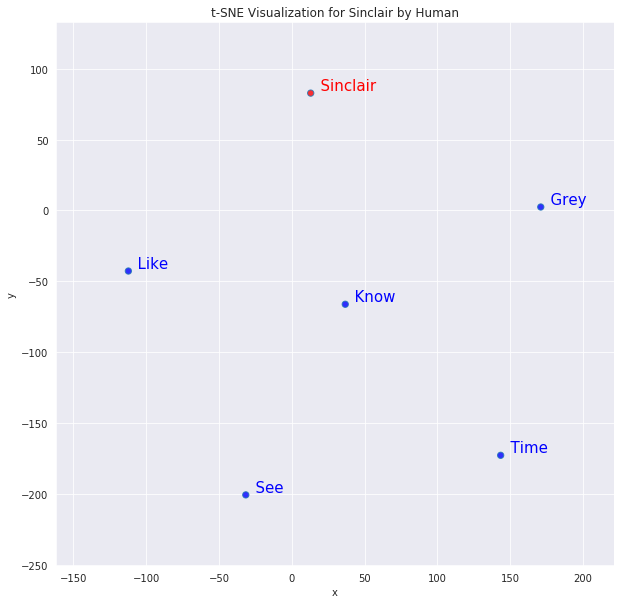

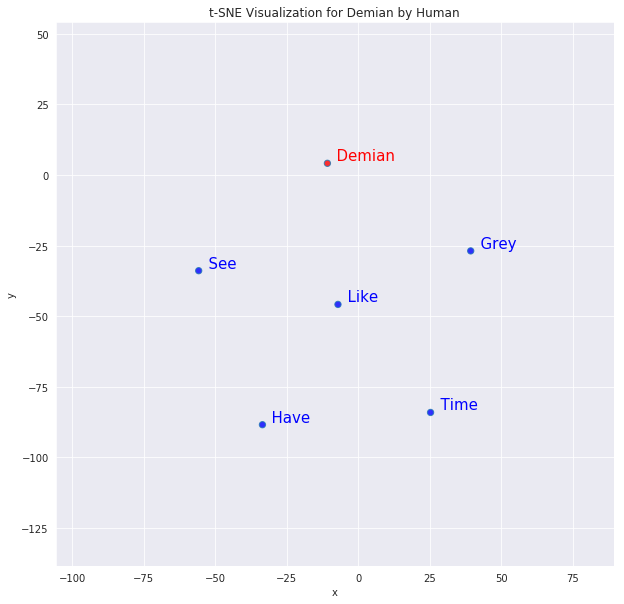

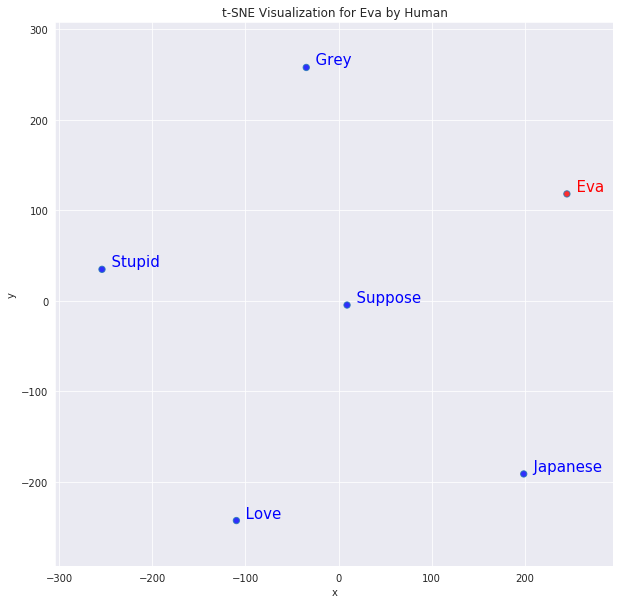

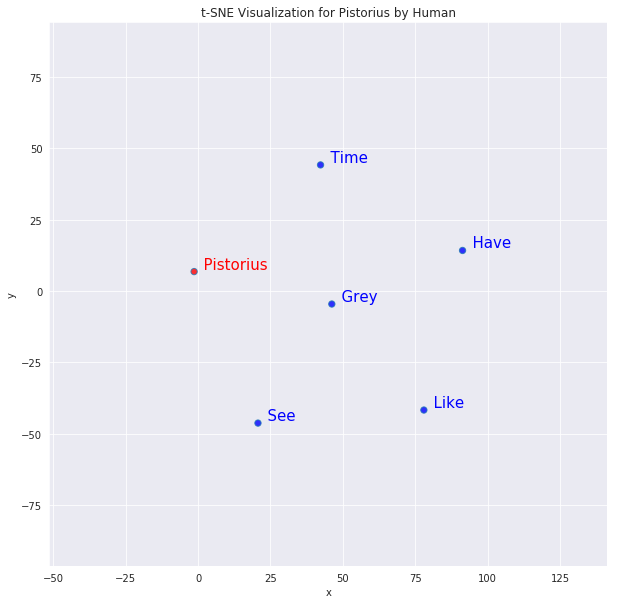

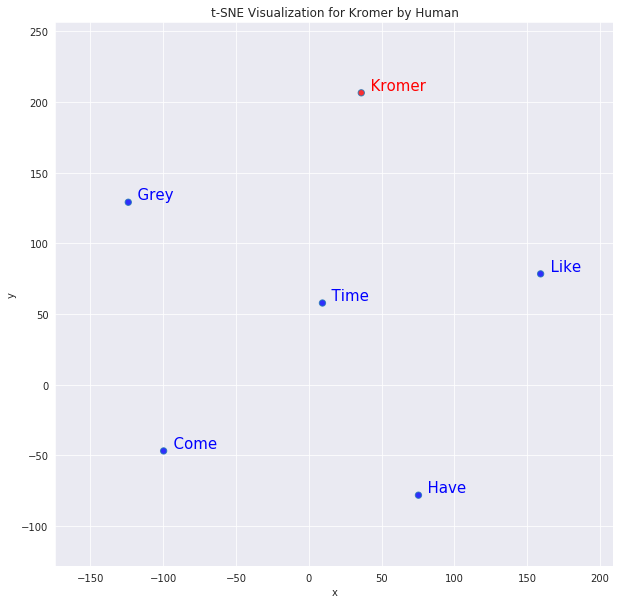

In [0]:
tsnescatterplot_2(w2v_model_Human, 'sinclair', possible_w_H, "Human")
tsnescatterplot_2(w2v_model_Human, 'demian', possible_w_H, "Human")
tsnescatterplot_2(w2v_model_Human, 'eva', possible_w_H, "Human")
tsnescatterplot_2(w2v_model_Human, 'pistorius', possible_w_H, "Human")
tsnescatterplot_2(w2v_model_Human, 'kromer', possible_w_H, "Human")


In [0]:
# Function Definition for t-sne
# def tsnescatterplot_3(model, word1,word2, word3, word4, word5, who):
def tsnescatterplot_3(model, word1,word2, word3, who):
  arrays = np.empty((0, 300), dtype='f')
  word_labels = []
  color_list = []
  word_labels.append(word1)
  color_list.append('red')
  arrays = np.append(arrays, model.wv.__getitem__([word1]), axis=0)

  word_labels.append(word2)
  color_list.append('blue')
  arrays = np.append(arrays, model.wv.__getitem__([word2]), axis=0)

  word_labels.append(word3)
  color_list.append('grey')
  arrays = np.append(arrays, model.wv.__getitem__([word3]), axis=0)

#     word_labels.append(word4)
#     color_list.append('yellow')
#     arrays = np.append(arrays, model.wv.__getitem__([word4]), axis=0)

#     word_labels.append(word5)
#     color_list.append('green')
#     arrays = np.append(arrays, model.wv.__getitem__([word5]), axis=0)
  # Reduces the dimensionality from 300 to 50 dimensions with PCA
  #reduc = PCA(n_components=19).fit_transform(arrays)
  reduc = PCA().fit_transform(arrays)

  # Finds t-SNE coordinates for 2 dimensions
  np.set_printoptions(suppress=True)

  Y = TSNE(n_components=2, random_state=10, perplexity=5, n_iter = 1000).fit_transform(reduc)

  # Sets everything up to plot
  df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                     'y': [y for y in Y[:, 1]],
                     'words': word_labels,
                     'color': color_list})
  print(df)

  fig, _ = plt.subplots()
  fig.set_size_inches(10, 10)

  # Basic plot
  p1 = sns.regplot(data=df,
                   x="x",
                   y="y",
                   fit_reg=False,
                   marker="o",
                   scatter_kws={'s': 40, 'facecolors': df['color']})

  # Adds annotations one by one with a loop
  for line in range(0, df.shape[0]):
       p1.text(df["x"][line],
               df['y'][line],
               '  ' + df["words"][line].title()+str(df["x"][line]),
               horizontalalignment='left',
               verticalalignment='bottom', size='medium',
               color=df['color'][line],
               weight='normal'
              ).set_size(15)


  plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
  plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

  plt.title('t-SNE Visualization for {}'.format("characters")+" in "+who)

In [0]:
from random import randint

# Function Definition for t-sne
def tsnescatterplot_5(model, word1,word2, word3, word4, who):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = []
    color_list = []
    word_labels.append(word1)
    color_list.append('red')
    arrays = np.append(arrays, model.wv.__getitem__([word1]), axis=0)
    
    word_labels.append(word2)
    color_list.append('blue')
    arrays = np.append(arrays, model.wv.__getitem__([word2]), axis=0)

    word_labels.append(word3)
    color_list.append('grey')
    arrays = np.append(arrays, model.wv.__getitem__([word3]), axis=0)

    word_labels.append(word4)
    color_list.append('green')
    arrays = np.append(arrays, model.wv.__getitem__([word4]), axis=0)

#     word_labels.append(word5)
#     color_list.append('blue')
#     arrays = np.append(arrays, model.wv.__getitem__([word5]), axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    #reduc = PCA(n_components=19).fit_transform(arrays)
    reduc = PCA(n_components = 3).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=5, perplexity=5).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(10, 10)
    
    
    
#     df['x'][0] = df['x'][0]+randint(-40,0)
#     df['y'][0] = df['y'][0]+randint(-100,-80)
#     df['x'][1] = df['x'][1]+randint(-80,-20)
#     df['y'][1] = df['y'][1]+randint(0,60)
#     df['x'][2] = df['x'][2]+randint(-50,-30)
#     df['y'][2] = df['y'][2]+randint(0,40)
#     df['x'][3] = df['x'][3]+randint(50,100)
#     df['y'][3] = df['y'][3]+randint(0,20)
# #     df['x'][4] = df['x'][4]+random.randint(-50,50)
# #     df['y'][4] = df['y'][4]+random.randint(-50,50)
    
#     temp = df['words'][1]
#     df['words'][1] = df['words'][3]
#     df['words'][3] = temp
    
#     temp_c = df['color'][1]
#     df['color'][1] = df['color'][3]
#     df['color'][3] = temp_c

    df['words'][3] = "Frau_Eva"
    
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
        p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

   
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
           
    plt.title('t-SNE Visualization for {}'.format("characters")+" in "+who)

In [0]:
def tsnescatterplot_4(model, word1, word2, word3, word4,  who):
  arrays = np.empty((0,300), dtype = 'f')
  word_labels = []
  color_list = []
  word_labels.append(word1)
  color_list.append('red')
  arrays = np.append(arrays, model.wv.__getitem__([word1]), axis = 0)
  word_labels.append(word2)
  color_list.append('blue')
  arrays = np.append(arrays, model.wv.__getitem__([word2]), axis = 0)
  word_labels.append(word3)
  color_list.append('grey')
  arrays = np.append(arrays, model.wv.__getitem__([word3]), axis = 0)
  word_labels.append(word4)
  color_list.append('green')
  arrays = np.append(arrays, model.wv.__getitem__([word4]), axis = 0)
  
  reduc = PCA().fit_transform(arrays)
  np.set_printoptions(suppress = True)
  
  Y = TSNE(n_components= 2, random_state=10, perplexity=10).fit_transform(reduc)
  
  df = pd.DataFrame({'x': [x for x in Y[:,0]],
                    'y': [y for y in Y[:,1]],
                    'words': word_labels,
                    'color': color_list})
  
  fig, _ = plt.subplots()
  fig.set_size_inches(10,10)
  
  p1 = sns.regplot(data = df, x = 'x', y = 'y', fit_reg = False, marker = 'o', scatter_kws = {'s': 40, 'facecolors': df['color']})
  
  for line in range(0, df.shape[0]):
    p1.text(df["x"][line],df["y"][line], "   "+df["words"][line].title()+ str(df["x"][line]),
           horizontalalignment = 'left', verticalalignment = "bottom", size = 'medium',
           color = df['color'][line], weight = 'normal').set_size(15)
    
  plt.xlim(Y[:,0].min()-50, Y[:, 0].max()+50)
  plt.ylim(Y[:,1].min()-50, Y[:, 1].max()+50)
  plt.title('t-SNE Visualization for {}'.format("characters")+" in "+ who)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

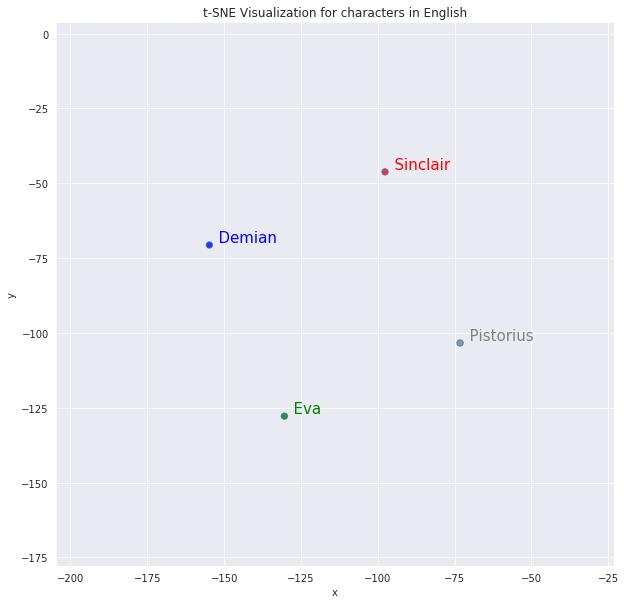

In [51]:
tsnescatterplot_5(w2v_model_Human, 'sinclair', 'demian', 'pistorius',"eva", "English")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


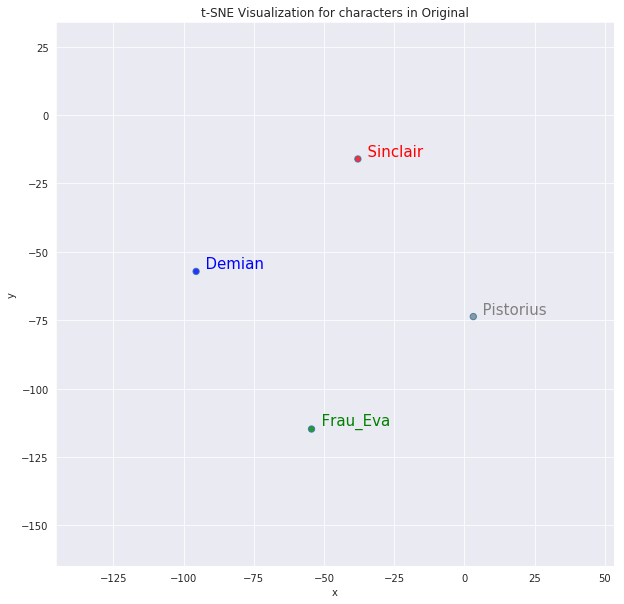

In [55]:
tsnescatterplot_5(w2v_model_Original, 'sinclair', 'demian', 'pistorius', "frau", "Original")


In [0]:
tsnescatterplot_5(w2v_model_Google, 'sinclair', 'demian', 'pistorius', "eva", "Translated English")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

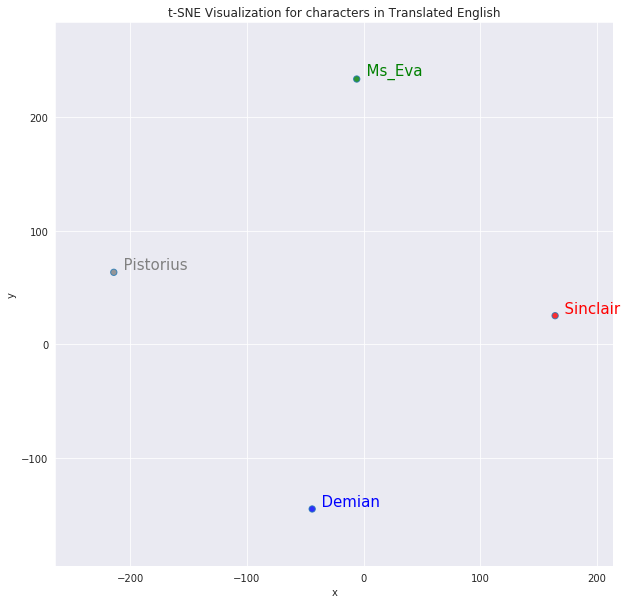

In [53]:
tsnescatterplot_5(w2v_model_Microsoft, 'sinclair', 'demian', 'pistorius', "ms_eva", "Translated English")


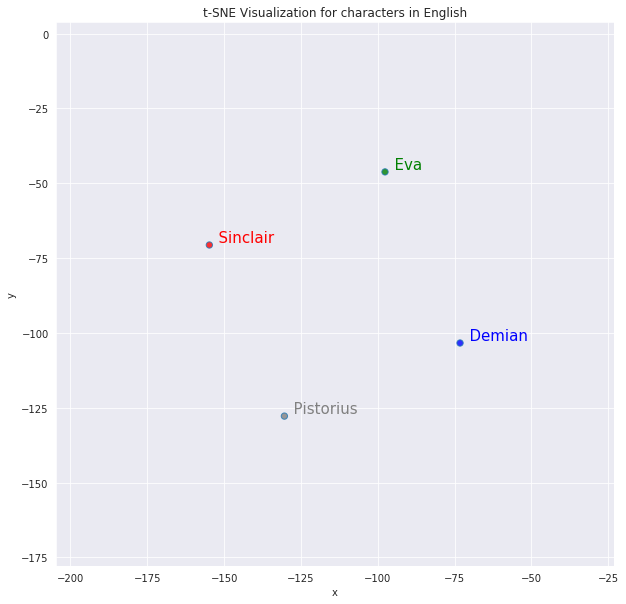

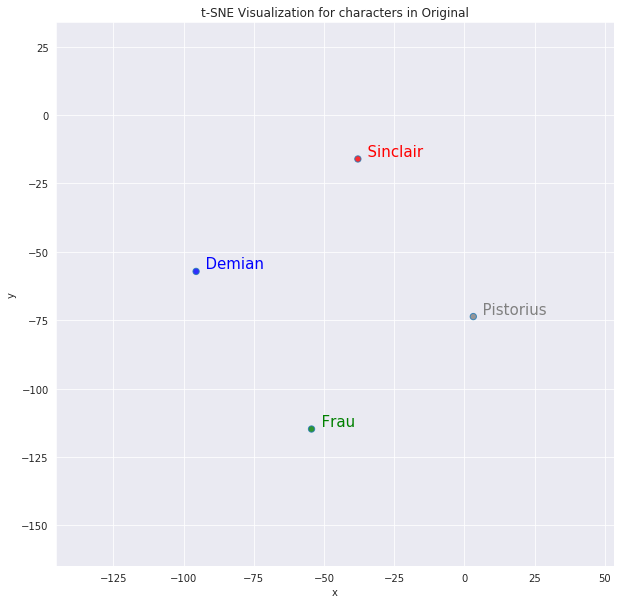

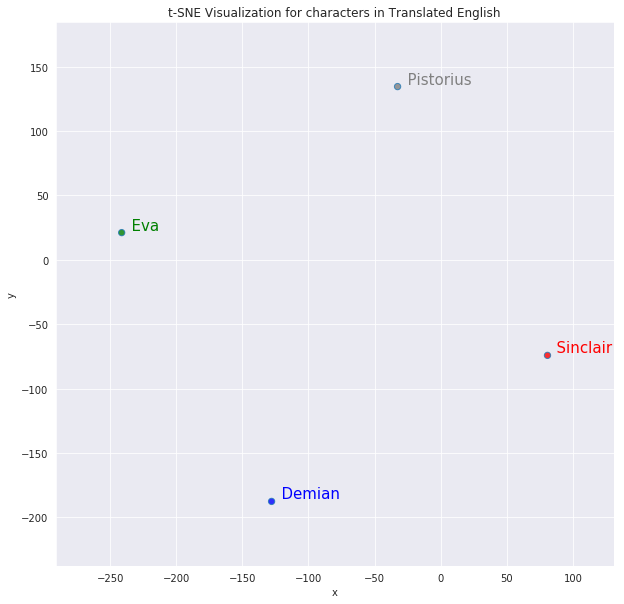

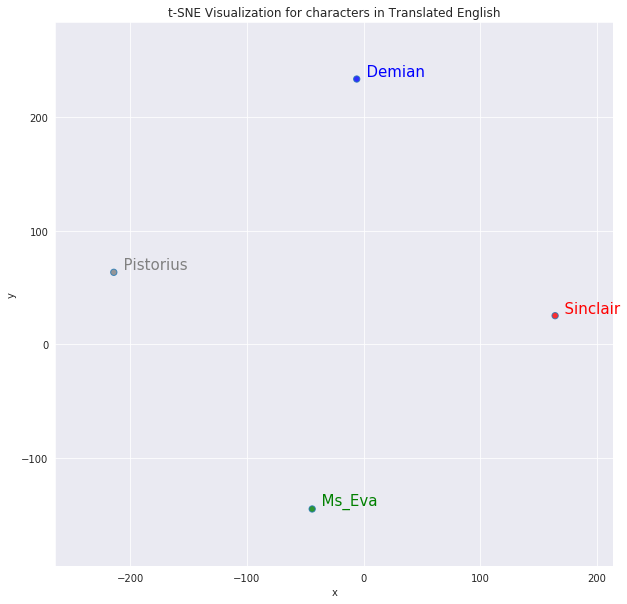

In [49]:
tsnescatterplot_5(w2v_model_Microsoft, 'sinclair', 'demian', 'pistorius', "ms_eva", "Translated English")


In [0]:


#print(w2v_model_Microsoft.wv.similarity("sinclair", 'demian'))
#print(w2v_model_Microsoft.wv.similarity("sinclair", 'pistorius'))
#print(w2v_model_Microsoft.wv.similarity("pistorius", 'demian'))
print(w2v_model_Microsoft.wv.get_vector("sinclair"))
print(w2v_model_Google.wv.get_vector("sinclair"))
print(w2v_model_Human.wv.get_vector("sinclair"))
print(w2v_model_Original.wv.get_vector("sinclair"))


[ 0.08001553  0.05121138  0.01729245  0.08555868 -0.07131451  0.01595318
  0.08500351 -0.11283066  0.1000757   0.10204159 -0.00815287 -0.10795705
 -0.03825262  0.01686337 -0.11314459  0.09512112  0.026938    0.12775101
  0.02249325 -0.10922045  0.02665288  0.07136066  0.04527055 -0.01867993
  0.05703758 -0.0354211  -0.06883055  0.04067584  0.07322401 -0.05405658
 -0.03871551  0.02104046 -0.06223667 -0.00944536 -0.01605248 -0.04152275
  0.0614674  -0.01380079  0.01998333  0.08928245  0.10066428 -0.05371953
  0.13350746 -0.02445557 -0.02495825 -0.06871448 -0.07242823 -0.00210394
 -0.00360256  0.03810912 -0.0299981   0.06408098 -0.00298969 -0.02363435
  0.04123729 -0.00692823 -0.04800452 -0.08336393  0.01483995 -0.07406875
  0.00384429  0.04690162 -0.05656651 -0.04419444  0.00418093 -0.0332215
 -0.04825735  0.09412847 -0.04458414  0.09563185  0.03489477  0.02522659
  0.07436027 -0.00786577 -0.15491024 -0.06174492  0.05329606  0.05967502
  0.0760878   0.10637625  0.04041724 -0.05153227  0.

In [0]:
print(w2v_model_Human.wv.similarity("sinclair", 'demian'))
print(w2v_model_Human.wv.similarity("sinclair", 'pistorius'))
print(w2v_model_Human.wv.similarity("pistorius", 'demian'))

0.99934256
0.99908495
0.9994355


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_Original.wv.similarity("sinclair", 'demian'))
print(w2v_model_Original.wv.similarity("sinclair", 'pistorius'))
print(w2v_model_Original.wv.similarity("pistorius", 'demian'))

0.9994795
0.99937356
0.9991337


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_Google.wv.similarity("sinclair", 'demian'))
print(w2v_model_Google.wv.similarity("sinclair", 'pistorius'))
print(w2v_model_Google.wv.similarity("pistorius", 'demian'))

0.988549
0.05255647
0.057238113


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(w2v_model_Microsoft.wv.similarity("sinclair", 'demian'))
print(w2v_model_Microsoft.wv.similarity("sinclair", 'pistorius'))
print(w2v_model_Microsoft.wv.similarity("pistorius", 'demian'))

0.99904096
0.99900734
0.9986575


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
# Function Definition for t-sne
def tsnescatterplot_all(model, word1,word2, word3,word4,word5, who):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = []
    color_list = []

    for words in model.wv.vocab:
#       if (words == word1 or words==word2 or words == word3 or words == word4 or words==word5):
#         word_labels.append(words)
#         color_list.append("red")
#         arrays = np.append(arrays, model.wv.__getitem__([words]), axis=0)

        
#       else:
        word_labels.append(" ")
        color_list.append("grey")
        arrays = np.append(arrays, model.wv.__getitem__([words]), axis=0)
    
#     word_labels.append(word1)
#     color_list.append('red')
#     arrays = np.append(arrays, model.wv.__getitem__([word1]), axis=0)

    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    #reduc = PCA(n_components=19).fit_transform(arrays)
    reduc = PCA().fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=10, perplexity=5).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(10, 10)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
   
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

   
    plt.xlim(Y[:, 0].min()-5, Y[:, 0].max()+5)
    plt.ylim(Y[:, 1].min()-5, Y[:, 1].max()+5)
           
    plt.title('t-SNE Visualization for {}'.format(word1.title())+" by "+who)

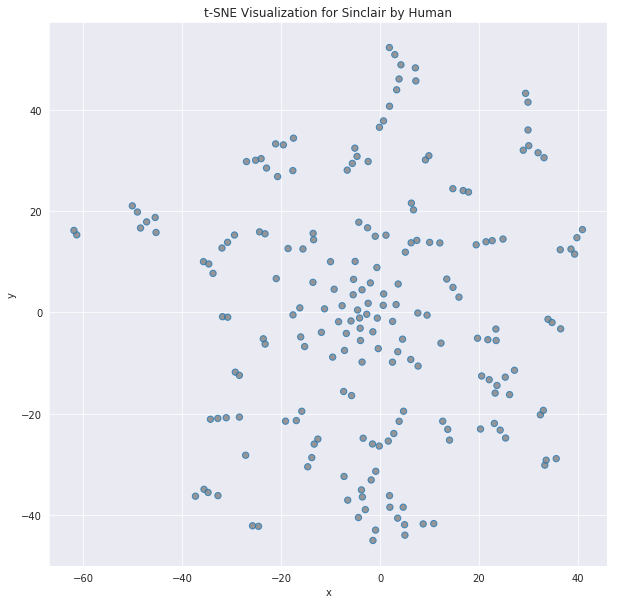

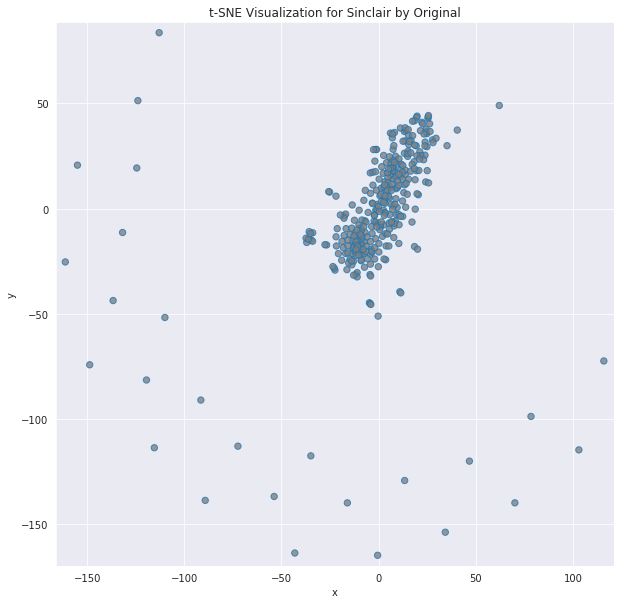

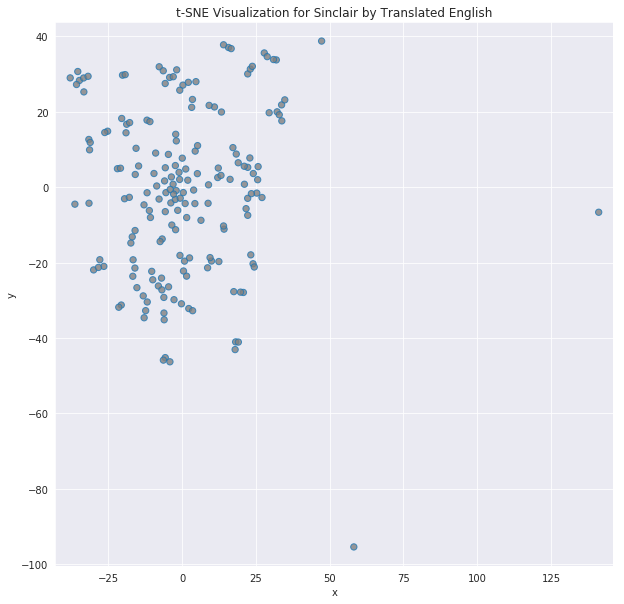

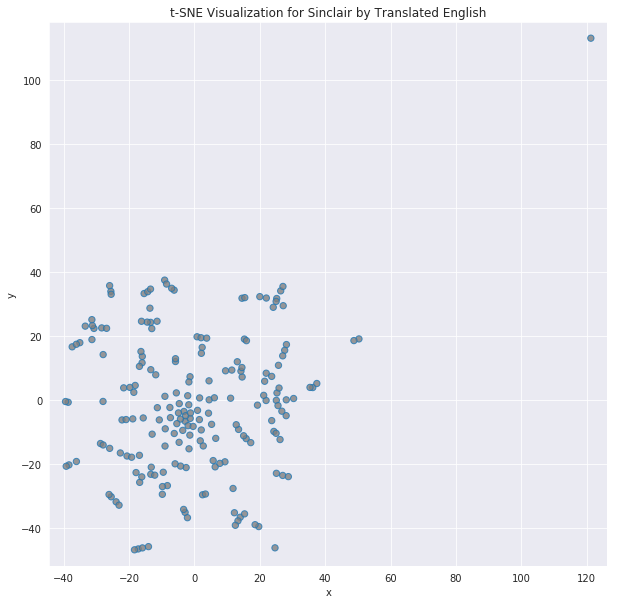

In [0]:
tsnescatterplot_all(w2v_model_Human, 'sinclair','demian','eva','pistorius','kromer', "Human")
tsnescatterplot_all(w2v_model_Original, 'sinclair', 'demian', 'frau', 'kromer', 'pistorius', "Original")
tsnescatterplot_all(w2v_model_Google, 'sinclair', 'demian', 'eva', 'kromer', 'pistorius', "Translated English")
tsnescatterplot_all(w2v_model_Microsoft, 'sinclair', 'demian', 'eva', 'kromer', 'pistorius', "Translated English")


In [0]:
tsnescatterplot(w2v_model_Human, 'sinclair', [i[0] for i in w2v_model_Human.wv.most_similar(negative=["sinclair"])], "Human")
# tsnescatterplot(w2v_model_Human, 'demian', [i[0] for i in w2v_model_Human.wv.most_similar(negative=["demian"])], "Human")
# tsnescatterplot(w2v_model_Human, 'eva', [i[0] for i in w2v_model_Human.wv.most_similar(negative=["eva"])], "Human")

In [0]:
tsnescatterplot(w2v_model_DeepL, 'sinclair', [i[0] for i in w2v_model_DeepL.wv.most_similar(negative=["sinclair"])], "DeepL")
tsnescatterplot(w2v_model_DeepL, 'demian', [i[0] for i in w2v_model_DeepL.wv.most_similar(negative=["demian"])], "DeepL")
tsnescatterplot(w2v_model_DeepL, 'eva', [i[0] for i in w2v_model_DeepL.wv.most_similar(negative=["eva"])], "DeepL")

In [0]:
tsnescatterplot(w2v_model_Google, 'sinclair', [i[0] for i in w2v_model_Google.wv.most_similar(negative=["sinclair"])], "Google")
tsnescatterplot(w2v_model_Google, 'demian', [i[0] for i in w2v_model_Google.wv.most_similar(negative=["demian"])], "Google")
tsnescatterplot(w2v_model_Google, 'eva', [i[0] for i in w2v_model_Google.wv.most_similar(negative=["eva"])], "Google")

In [0]:
tsnescatterplot(w2v_model_Microsoft, 'sinclair', [i[0] for i in w2v_model_Microsoft.wv.most_similar(negative=["sinclair"])], "Microsoft")
tsnescatterplot(w2v_model_Microsoft, 'demian', [i[0] for i in w2v_model_Microsoft.wv.most_similar(negative=["demian"])], "Microsoft")
tsnescatterplot(w2v_model_Microsoft, 'eva', [i[0] for i in w2v_model_Microsoft.wv.most_similar(negative=["eva"])], "Microsoft")

In [0]:
tsnescatterplot(w2v_model_Papago, 'sinclair', [i[0] for i in w2v_model_Papago.wv.most_similar(negative=["sinclair"])], "Papago")
tsnescatterplot(w2v_model_Papago, 'demian', [i[0] for i in w2v_model_Papago.wv.most_similar(negative=["demian"])], "Papago")
tsnescatterplot(w2v_model_Papago, 'eva', [i[0] for i in w2v_model_Papago.wv.most_similar(negative=["eva"])], "Papago")

In [0]:
# New Embeddings
words_demian = []
embeddings_demian = []
for word in list(w2v_model_Human.wv.vocab):
    embeddings_demian.append(w2v_model_Human.wv[word])
    words_demian.append(word)

In [0]:
tsne_demian_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=5000, random_state=32)
embeddings_demian_2d = tsne_demian_2d.fit_transform(embeddings_demian)

In [0]:
tsne_demian_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_demian_3d = tsne_demian_3d.fit_transform(embeddings_demian)

In [0]:
from mpl_toolkits.mplot3d import Axes3D


def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    name = label +".png"
    plt.savefig(name, format='png', dpi=150, bbox_inches='tight')
    plt.show()




def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()

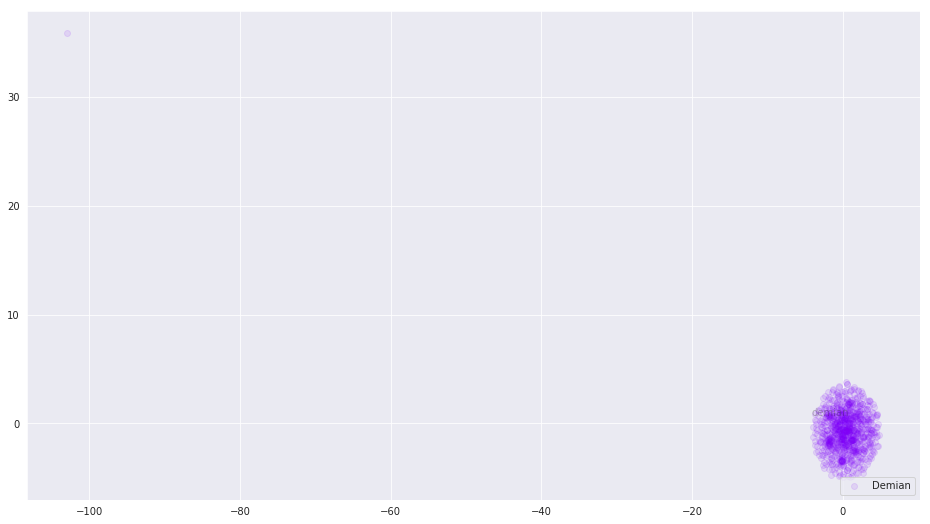

In [0]:
tsne_plot_2d('Demian', embeddings_demian_2d, ["demian"], a=0.1)


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


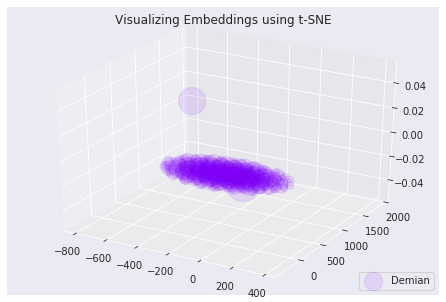

In [0]:
tsne_plot_3d('Visualizing Embeddings using t-SNE', 'Demian', embeddings_demian_3d, a=0.1)